# MNIST + CNN basic
 - Convolution layer : 특징맵(feature mat)
 - Pooling layer : 픽셀 축소(down sampling), 특징 강조 

In [1]:
import tensorflow.compat.v1 as tf # ver1.x
tf.disable_v2_behavior() # ver2.0 사용안함

from tensorflow.keras.datasets.mnist import load_data # dataset load
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


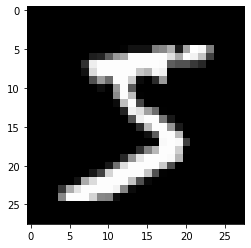

In [3]:

# 1. image read 
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,) : 10진수 
print(x_test.shape) # (10000, 28, 28)
print(y_test.shape) # (10000,) : 10진수 



# 2. 실수형 변환 : int -> float32
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# 3. 정규화 
x_train = x_train / 255 # x_train = x_train / 255
x_test = x_test / 255


# first image 
img = x_train[0]
plt.imshow(img, cmap='gray') # cmap='gray' : xray func

# input image reshape  
img.shape # (28,28)
firstImg = img.reshape(1,28,28,1) # 합성곱을 위해 reshape : (size, h, w, color)

# Filter 변수 정의 : 사용자 지정
Filter = tf.Variable(tf.random_normal([3,3,1,5])) # 난수 (row, col, color, fmap)



Tensor("Conv2D:0", shape=(1, 28, 28, 5), dtype=float32)
Tensor("MaxPool:0", shape=(1, 14, 14, 5), dtype=float32)
(5, 28, 28, 1)


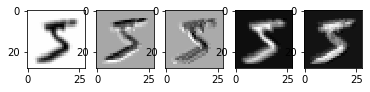

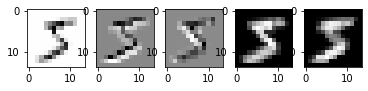

In [4]:

# 1. Convolution layer : 특징 추출
conv2d = tf.nn.conv2d(firstImg, Filter, strides=[1,1,1,1], padding='SAME')
print(conv2d) # shape=(1, 28, 28, 5)

# 2. Pool layer : down samplint
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1],strides=[1,2,2,1],
            padding = 'SAME')
print(pool) # shape=(1, 14, 14, 5)


with tf.Session() as sess :
    sess.run(tf.global_variables_initializer()) # filter 초기화 
    
    # 합성곱 연산 
    conv2d_img = sess.run(conv2d)    
    conv2d_img = np.swapaxes(conv2d_img, 0, 3) # 축 교환 
    print(conv2d_img.shape) # (5, 14, 14, 1)
    
    for i, img in enumerate(conv2d_img) :
        plt.subplot(1, 5, i+1) # 1행5열,1~5 
        plt.imshow(img.reshape(28,28), cmap='gray') # 
    plt.show()
    
    # 폴링 연산 
    pool_img = sess.run(pool)
    pool_img = np.swapaxes(pool_img, 0, 3)
    
    for i, img in enumerate(pool_img) :
        plt.subplot(1,5, i+1) # 1행5열,1~5 
        plt.imshow(img.reshape(14,14), cmap='gray') 
    plt.show()
    